newyork taxt data analysis: https://github.com/swapnanilsharma/Taxi-demand-prediction-in-New-York-City/blob/master/NYC%20Final.ipynb

In [2]:
import matplotlib.pyplot as plt
import dask.dataframe as dd#similar to pandas
import pandas as pd
import datetime #Convert to unix time
import time #Convert to unix 
import numpy as np
import seaborn as sns#Plots

In [3]:
# 데이터 열기
pd.set_option('display.max_columns', None)

month = pd.read_parquet('yellow_tripdata_2018-01.parquet',engine='pyarrow')

print(month)

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2018-01-01 00:21:05   2018-01-01 00:24:23                1   
1               1  2018-01-01 00:44:55   2018-01-01 01:03:05                1   
2               1  2018-01-01 00:08:26   2018-01-01 00:14:21                2   
3               1  2018-01-01 00:20:22   2018-01-01 00:52:51                1   
4               1  2018-01-01 00:09:18   2018-01-01 00:27:06                2   
...           ...                  ...                   ...              ...   
8760682         1  2018-01-31 23:21:35   2018-01-31 23:34:20                2   
8760683         1  2018-01-31 23:35:51   2018-01-31 23:38:57                1   
8760684         2  2018-01-31 23:28:00   2018-01-31 23:37:09                1   
8760685         2  2018-01-31 23:24:40   2018-01-31 23:25:28                1   
8760686         2  2018-01-31 23:28:16   2018-01-31 23:28:38                1   

         trip_distance  Rat

In [4]:
# 널값 아닌 데이터 수
month.notnull().sum()

VendorID                 8760687
tpep_pickup_datetime     8760687
tpep_dropoff_datetime    8760687
passenger_count          8760687
trip_distance            8760687
RatecodeID               8760687
store_and_fwd_flag       8760687
PULocationID             8760687
DOLocationID             8760687
payment_type             8760687
fare_amount              8760687
extra                    8760687
mta_tax                  8760687
tip_amount               8760687
tolls_amount             8760687
improvement_surcharge    8760687
total_amount             8760687
congestion_surcharge          12
airport_fee                   12
dtype: int64

In [7]:
print(month.shape)

(8760687, 19)


In [13]:
# 상위 값 5개
month.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,NaN
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30,NaN,NaN
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30,NaN,NaN
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80,NaN,NaN
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55,NaN,NaN


In [33]:
# def convert_to_unix(s):

#     return time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").timetuple())
    
def return_with_trip_times(month):
    # 탑승, 하차 시간 가져오기
    duration = month[['tpep_pickup_datetime', 'tpep_dropoff_datetime']]
    # unix time으로 변환
    duration_pickup = [x for x in duration['tpep_pickup_datetime'].values]
    duration_dropoff = [x for x in duration['tpep_dropoff_datetime'].values]
    
    # 이동 시간(분)
    onemin = pd.Timedelta(minutes=1)
    durations = (np.array(duration_dropoff) - np.array(duration_pickup)) / onemin
    #print(durations)

    new_frame = month[['passenger_count','trip_distance','PULocationID','DOLocationID', 'total_amount']]

    # 이동 시간과 이동 속도를 담은 새 데이터 생성    
    new_frame['trip_times'] = durations
    new_frame['pickup_times'] = duration_pickup
    # /hour로 변환
    new_frame['speed'] = 60 * (new_frame['trip_distance']/new_frame['trip_times'])

    return new_frame

frame_with_durations = return_with_trip_times(month)


[ 3.3        18.16666667  5.91666667 ...  9.15        0.8
  0.36666667]


C:\Users\sktmd\AppData\Local\Temp\ipykernel_11568\1153349893.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_frame['trip_times'] = durations
C:\Users\sktmd\AppData\Local\Temp\ipykernel_11568\1153349893.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_frame['pickup_times'] = duration_pickup
C:\Users\sktmd\AppData\Local\Temp\ipykernel_11568\1153349893.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

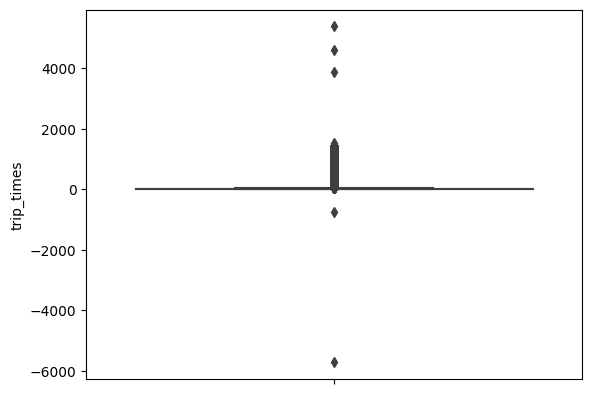

In [37]:
# 분단위
sns.boxplot(y="trip_times", data=frame_with_durations)
plt.show()

In [62]:
# 10%마다 해당되는 시간
for i in range(0, 100, 10):
    var = frame_with_durations["trip_times"].values
    var = np.sort(var, axis=None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value id ", var[-1])

0 percentile value is -5711.583333333333
10 percentile value is 3.8833333333333333
20 percentile value is 5.483333333333333
30 percentile value is 7.0
40 percentile value is 8.6
50 percentile value is 10.366666666666667
60 percentile value is 12.466666666666667
70 percentile value is 15.133333333333333
80 percentile value is 18.933333333333334
90 percentile value is 25.683333333333334
100 percentile value id  5382.066666666667


In [63]:
# 90%~100%마다 해당되는 시간
for i in range(90, 100):
    var = frame_with_durations["trip_times"].values
    var = np.sort(var, axis=None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value id ", var[-1])

90 percentile value is 25.683333333333334
91 percentile value is 26.75
92 percentile value is 27.95
93 percentile value is 29.366666666666667
94 percentile value is 31.016666666666666
95 percentile value is 33.03333333333333
96 percentile value is 35.6
97 percentile value is 39.083333333333336
98 percentile value is 44.416666666666664
99 percentile value is 54.46666666666667
100 percentile value id  5382.066666666667


In [71]:
# 0%~10%마다 해당되는 시간
for i in range(0, 11):
    var = frame_with_durations["trip_times"].values
    var = np.sort(var, axis=None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))

0 percentile value is -5711.583333333333
1 percentile value is 1.1833333333333333
2 percentile value is 1.8666666666666667
3 percentile value is 2.283333333333333
4 percentile value is 2.5833333333333335
5 percentile value is 2.85
6 percentile value is 3.0833333333333335
7 percentile value is 3.3
8 percentile value is 3.5
9 percentile value is 3.7
10 percentile value is 3.8833333333333333


In [103]:
# 시간이 이상하게 튀는 값 삭제
frame_with_durations_modified=frame_with_durations[(frame_with_durations.trip_times>1) & (frame_with_durations.trip_times<60)]
print(frame_with_durations_modified.shape)

(8623324, 8)


In [106]:
# 튀는 값 수정 이후 최대 최소
var = frame_with_durations_modified["trip_times"].values
print(var[0], var[-1])

3.3 9.15


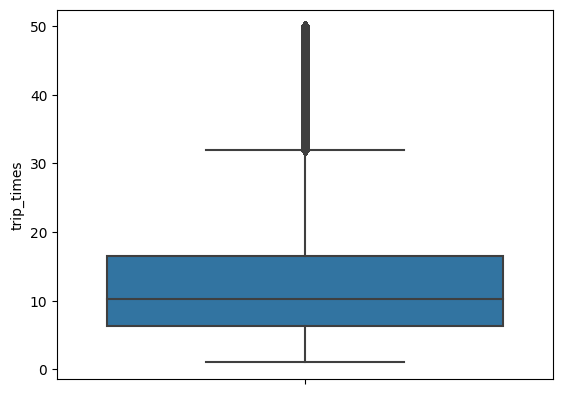

In [94]:
sns.boxplot(y="trip_times", data=var)
plt.show()